###  Plot the training data

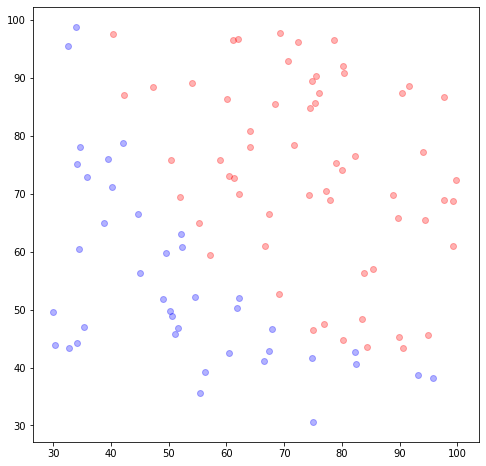

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: x, Length: 100, dtype: float64

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data    =  pd.read_csv('data.txt',sep=',',engine='python',encoding='cp949',names=['x','y','label'])

X   = data['x']
Y   = data['y']
LABEL  = data['label']

x_label0    = data.loc[data['label'] == 0,'x']
x_label1    = data.loc[data['label']==1,'x']


y_label0    = data.loc[data['label']==0,'y']
y_label1    = data.loc[data['label']==1,'y']


plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


In [163]:
x_n = (x-x.mean()) / x.std()
y_n = (y-y.mean()) / y.std()

##### make matrix

In [217]:
#train data matrix
t_matrix = np.c_[np.ones(x.shape[0]),x_n,y_n]
label

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [292]:
alpha = 1
iteration = 5000
m = label.size
#theta 랜덤 생성
np.random.seed(777)
theta = np.random.rand(3)
theta

array([0.15266373, 0.30235661, 0.06203641])

### Objective Function

1.cost function 만들기

In [293]:
#make sigmoid function
m = label.size

def cost(label,hx):
    j = np.mean(((-label*np.log(hx))-((1-label)*np.log(1-hx))))
    return j


In [294]:
def gradient_descent(matrix,label,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    for i in range(iterations):
        prediction = np.dot(matrix,theta)
        sig = 1/(1+np.exp(-prediction))
        error = sig - label
        cost_history.append(cost(label,sig))
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,error))
        theta_history.append(theta)
    return theta_history, cost_history


In [295]:
theta_history,cost_history = gradient_descent(t_matrix,label,theta,iteration,alpha)

## Plot the estimated parameters

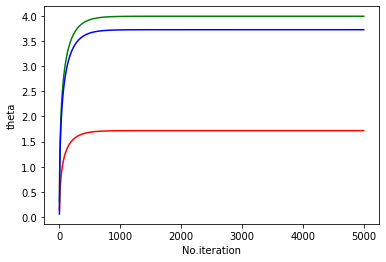

In [296]:

theta0 =[]
theta1 =[]
theta2 =[]
for i in range(iteration):
    theta0.append(theta_history[i][0])
    theta1.append(theta_history[i][1])
    theta2.append(theta_history[i][2])

plt.ylabel('theta')
plt.xlabel('No.iteration')
plt.plot(theta0,c='r')
plt.plot(theta1,c='g')
plt.plot(theta2,c='b')
plt.show()

### Plot the training error

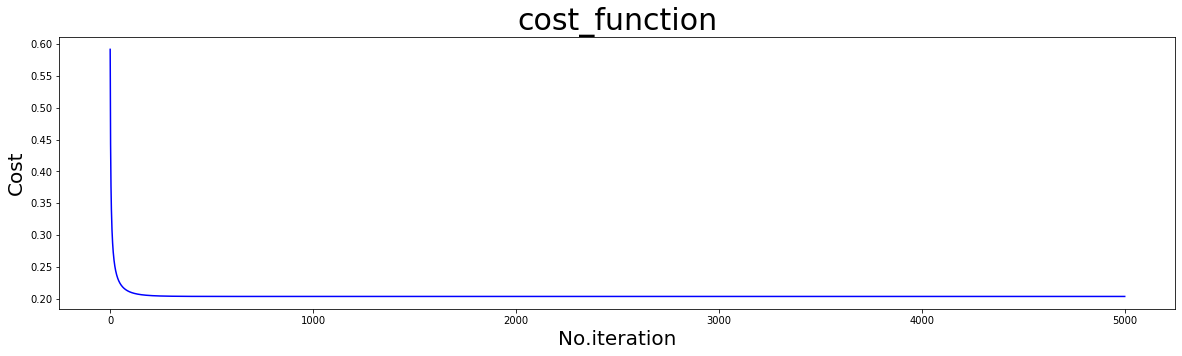

In [298]:
plt.figure(figsize=(20, 5))
plt.title('cost_function',size = 30)
plt.ylabel('Cost',size = 20)
plt.xlabel('No.iteration',size = 20)
plt.plot(cost_history,c='b')
plt.show()